In [1]:
#Importieren der notwendigen librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Laden des Datensatzes von einer csv-Datei in ein pandas DataFrame
dataset_EDDM = pd.read_csv('trafficEDDM.csv', index_col=0)
dataset_EDDM = pd.read_csv('https://raw.githubusercontent.com/DanielLubigTUD/AirportOperations2022/main/trafficEDDM.csv', index_col=0)

#Umwandeln der Datentypen von relevanten Spalten (object zu datetime und object zu timedelta)
dataset_EDDM['STD'] = pd.to_datetime(dataset_EDDM['STD'])
dataset_EDDM['ATD'] = pd.to_datetime(dataset_EDDM['ATD'])
dataset_EDDM['STA'] = pd.to_datetime(dataset_EDDM['STA'])
dataset_EDDM['ATA'] = pd.to_datetime(dataset_EDDM['ATA'])
dataset_EDDM['FlightTime[s]'] = pd.to_timedelta(dataset_EDDM['FlightTime[s]']) 

## Aufgabe 1) Movements pro Tag im Datenzeitraum

In [3]:
#Definieren des Start- und Endzeitpunktes des Datensatzes
start = pd.Timestamp(2019,9,1,0,0,0)
end = pd.Timestamp(2019,9,30,0,0,0)

#Liste mit allen Tagen im Datensatz erstellen
day_list = pd.date_range(start, end, freq='1d')

#DataFrame für das Ergebnis definieren
MOV_results = pd.DataFrame([])

#Schleife zur Ermitlung der Movements für jeden Tag initiieren
for i in day_list:
    #Mithilfe unterer Grenze (i) die obere Grenze (j) bestimmen --> Zeitdauer = 1 Tag
    j = i + pd.Timedelta(1, unit='d')
    
    #Filtern des Gesamtdatensatzes nach Ankünften am Flughafen EDDM
    arr = dataset_EDDM.query('Destination=="EDDM"')
    #Suche nach Flügen deren ATA innerhalb der Grenzen von i und j liegen
    arr = arr.query('ATA>=@i and ATA<=@j')
    #Bestimmen der Anzahl aller Flüge, welche oberes Kriterium erfüllen
    arr = len(arr)
    
    #Filtern des Gesamtdatensatzes nach Abflügen am Flughafen EDDM
    dep = dataset_EDDM.query('Departure=="EDDM"')
    #Suche nach Flügen deren ATD innerhalb der Grenzen von i und j liegen
    dep = dep.query('ATD>=@i and ATD<=@j')
    #Bestimmen der Anzahl aller Flüge, welche oberes Kriterium erfüllen
    dep = len(dep)
    
    #Speichen der Ergebnisse im Lösungs DataFrame
    MOV_results.loc[i,'Arr'] = arr
    MOV_results.loc[i,'Dep'] = dep 
    
#Bestimmen der Movements durch Addition der Anzahlen für Starts und Landungen für jeden Tag
MOV_results['Mov'] = MOV_results['Arr'] + MOV_results['Dep']

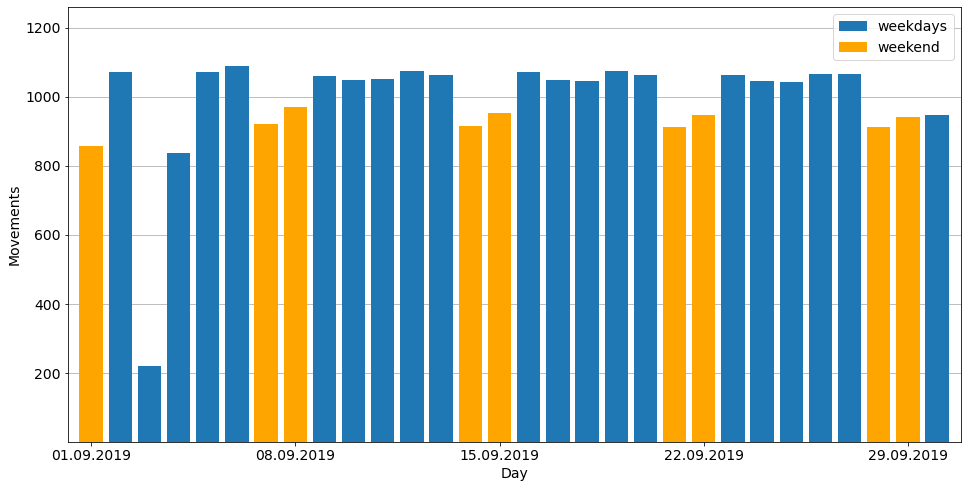

In [9]:
#Extrahieren der y-Komponente für das Diagramm (Anzahl der Movements)
y = MOV_results['Mov'].values.tolist()
#Festlegen der x-Komponente für das Diagramm (Tag im Datenzeitraum)
x = np.arange(0, len(y))

#Erstellen eines Plots
fig, ax = plt.subplots(1,1,figsize=(16,8))

#Balkendiagramm erstellen
ax.bar(x,y,label='weekdays', zorder=2)

#Ausprägung der x- und y-Achse festlegen
ax.set_xlim(-0.8,29.8)
ax.set_ylim(0,1260)

#Achsenbeschriftung definieren
ax.set_ylabel('Movements', fontsize=14)
ax.set_xlabel('Day', fontsize=14)

#Beschriftung der x-Achse formatieren
ax.set_xticks([0,7,14,21,28])
ax.set_xticklabels(['01.09.2019', '08.09.2019', '15.09.2019', '22.09.2019', '29.09.2019'], fontsize=14)

#Beschriftung der y-Achse formatieren
ax.set_yticks(np.arange(200,1400,step=200))
ax.set_yticklabels(np.arange(200,1400,step=200), fontsize=14)

#Erstellen von Listen für die Wochenendtagen
sundays = np.arange(0,len(y),step=7)
saturdays = np.arange(6,len(y),step=7)

#Balkendiagramm für alle Sonntage 
for i in sundays:
    ax.bar(x[i],y[i],color='orange', zorder=2)

#Balkendiagramm für alle Samstage
for j in saturdays:
    ax.bar(x[j],y[j],color='orange', zorder=2)

#Dummy-Balkendiagramm für Legende
ax.bar(x[0],y[0],label='weekend',color='orange')    

#Legende einfügen
ax.legend(fontsize=14)

ax.grid(axis='y', zorder=0)

plt.savefig('Movements_EDDM.png', dpi=300, bbox_inches='tight')

## Aufgabe 2.B) 30th busiest hour in the dataset 

In [5]:
#Start- und Endzeitpunkt zur Bestimmung  
start_hour = pd.Timestamp(2019,9,1,0,0,0)
end_hour = pd.Timestamp(2019,9,30,23,0,0)

#Liste mit allen Stunden zwischen Start- und Endzeitpunkt
hour_list = pd.date_range(start_hour, end_hour, freq='1h')

#DataFrame für das Ergebnis definieren
MOV_hour_results = pd.DataFrame([])

#Schleife zur Ermitlung der Movements für jede Stunde initiieren
for i in hour_list:
    #Mithilfe unterer Grenze (i) die obere Grenze (j) bestimmen --> Zeitdauer = 1 Stunde
    j = i + pd.Timedelta(1, unit='h')
    
    #Filtern des Gesamtdatensatzes nach Ankünften am Flughafen EDDM
    arr = dataset_EDDM.query('Destination=="EDDM"')
    #Suche nach Flügen deren ATA innerhalb der Grenzen von i und j liegen
    arr = arr.query('ATA>=@i and ATA<=@j')
    #Bestimmen der Anzahl aller Flüge, welche oberes Kriterium erfüllen
    arr = len(arr)
    
    #Filtern des Gesamtdatensatzes nach Abflügen am Flughafen EDDM
    dep = dataset_EDDM.query('Departure=="EDDM"')
    #Suche nach Flügen deren ATD innerhalb der Grenzen von i und j liegen
    dep = dep.query('ATD>=@i and ATD<=@j')
    #Bestimmen der Anzahl aller Flüge, welche oberes Kriterium erfüllen
    dep = len(dep)
    
    #Speichen der Ergebnisse im Lösungs DataFrame
    MOV_hour_results.loc[i,'Arr'] = arr
    MOV_hour_results.loc[i,'Dep'] = dep    

#Bestimmen der Movements durch Addition der Anzahlen für Starts und Landungen für jede Stunde    
MOV_hour_results['Mov'] = MOV_hour_results['Arr'] + MOV_hour_results['Dep']    

In [6]:
#absteigendes Sortieren des Dataframe nach Anzahl der Movements
busy_hour = MOV_hour_results.sort_values(by='Mov', ascending=False)

#Variante 1 - iloc Funktion
busy_hour.iloc[30:31,:]

#Variante 2 - Erstellen einer Ranking-Spalte + loc Funktion
busy_hour['rank'] = np.arange(1, len(busy_hour)+1)
mov = busy_hour.query('rank==30')
mov.index = ['cap_value']
mov = mov.loc['cap_value', 'Mov'].astype(int)

#Ausgabe des Ergebnisses
print('Die Kapazität des Flughafen München (30. verkehrsreichste Stunde) liegt bei ' + str(mov) + ' Movements pro Stunde.')

Die Kapazität des Flughafen München (30. verkehrsreichste Stunde) liegt bei 75 Movements pro Stunde.
